### quest
- 주차별 환자 입원/퇴원 추이 시각화
- 요일별 환자 입원/퇴원 추이 시각화
- hint : df_DL['날짜_datetime'].dt.day_name()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [14]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1894 non-null   int64         
 1   환자ID                    1894 non-null   object        
 2   Large Lymphocyte        1894 non-null   float64       
 3   Location of herniation  1894 non-null   int64         
 4   ODI                     462 non-null    float64       
 5   가족력                     1843 non-null   float64       
 6   간질성폐질환                  1894 non-null   int64         
 7   고혈압여부                   1894 non-null   int64         
 8   과거수술횟수                  1894 non-null   int64         
 9   당뇨여부                    1894 non-null   int64         
 10  말초동맥질환여부                1894 non-null   int64         
 11  빈혈여부                    1894 non-null   int64         
 12  성별                      1894 non-null   int64   

In [22]:
df_ROS.describe(include='object')

,환자ID,직업,수술기법,혈액형,척추이동척도
count,1894,1479,1813,1894,1894
unique,1894,17,2,4,5
top,1PT,사무직,TELD,RH+A,Middle
freq,1,449,1673,688,1260


In [18]:
columns_to_view = ['입원일자', '퇴원일자']
df_view = df_ROS[columns_to_view]
print(df_view)

          입원일자      퇴원일자
0     20190713  20190716
1     20190715  20190716
2     20190729  20190801
3     20190731  20190803
4     20190903  20190907
...        ...       ...
1889  20170407  20170408
1890  20170426  20170429
1891  20170410  20170412
1892  20170408  20170411
1893  20170412  20170413

[1894 rows x 2 columns]


### int -> object 타입변환

In [29]:
df_ROS['입원일자'] = df_ROS['입원일자'].apply(str)
df_ROS['퇴원일자'] = df_ROS['퇴원일자'].apply(str)

In [30]:
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'], format='%Y%m%d') 
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'], format='%Y%m%d') 

In [31]:
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,입원일자_datetime,퇴원일자_datetime
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,36.6,14.4,0,-1.01,2048.5,4,Down,0,2019-07-13,2019-07-16
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,7.2,17.8,0,-1.14,1753.1,4,Up,0,2019-07-15,2019-07-16


In [38]:
df_ROS['입원일자_datetime_year'] = df_ROS['입원일자_datetime'].dt.year
df_ROS['퇴원일자_datetime_year'] = df_ROS['퇴원일자_datetime'].dt.year
#df_ROS['입원일자_datetime_month'] = df_ROS['입원일자_datetime_month'].dt.month

<Axes: xlabel='입원일자_datetime_year'>

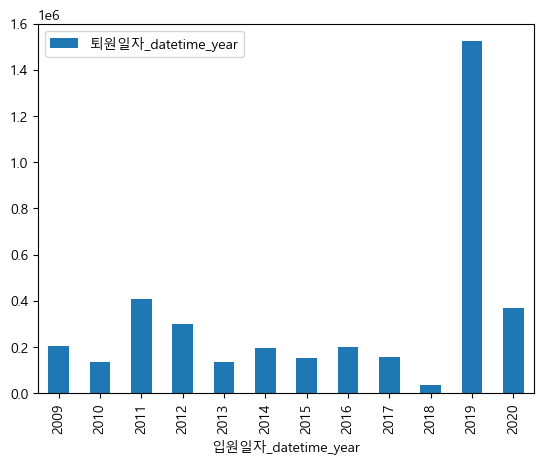

In [50]:
pd.pivot_table(data=df_ROS, index='입원일자_datetime_year', values='퇴원일자_datetime_year', aggfunc=sum).plot(kind='bar')  

In [56]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear

C:\Users\04-02\AppData\Local\Temp\ipykernel_6152\1239965468.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear
C:\Users\04-02\AppData\Local\Temp\ipykernel_6152\1239965468.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear


### 주차별 환자 입원/퇴원 추이 시각화 및 인사이트 1차 방법 (2차 데이터 사용시)

<Axes: xlabel='입원일자_datetime_week'>

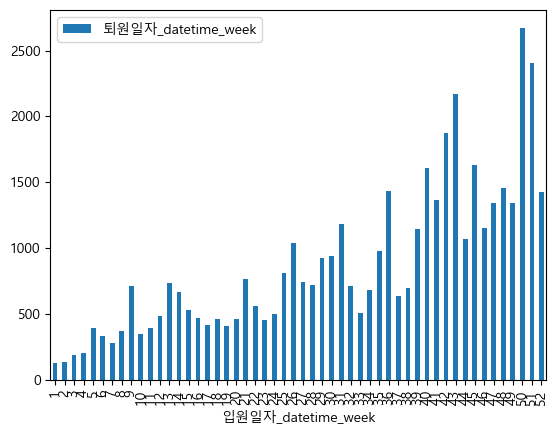

In [51]:
pd.pivot_table(data=df_ROS, index='입원일자_datetime_week', values='퇴원일자_datetime_week', aggfunc=sum).plot(kind='bar')

### 주차별 환자 입원/퇴원 추이 시각화 및 인사이트 2차 방법 (단순 시각화) 

<Axes: xlabel='입원일자_datetime_week', ylabel='퇴원일자_datetime_week'>

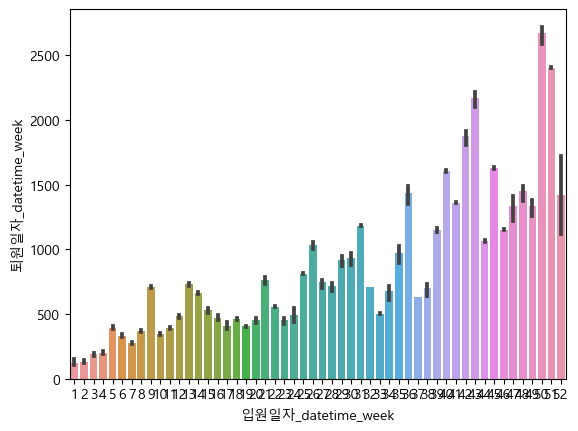

In [52]:
sns.barplot(data=df_ROS, x='입원일자_datetime_week', y='퇴원일자_datetime_week', estimator='sum')

In [40]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear

C:\Users\04-02\AppData\Local\Temp\ipykernel_6152\1239965468.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.weekofyear
C:\Users\04-02\AppData\Local\Temp\ipykernel_6152\1239965468.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.weekofyear


<Axes: xlabel='입원일자_datetime_week', ylabel='퇴원일자_datetime_week'>

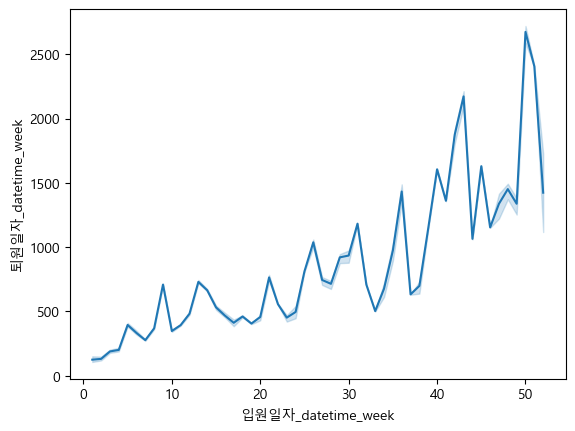

In [60]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_week', y='퇴원일자_datetime_week', estimator='sum')

### 요일별 환자 입원/퇴원 추이 시각화 및 인사이트 1차 방법 (2차 데이터 사용시)

In [61]:
# df_ROS['요일'] = df_ROS['입원일자_datetime'].dt.day_name()

df_ROS['입원일자_datetime_day'] = df_ROS['입원일자_datetime'].dt.day_name()
df_ROS['퇴원일자_datetime_day'] = df_ROS['퇴원일자_datetime'].dt.day_name()

In [ ]:
day_counts = df_ROS.groupby('입원일자_datetime_day')['퇴원일자_datetime_day'].count()

<Axes: xlabel='입원일자_datetime_day'>

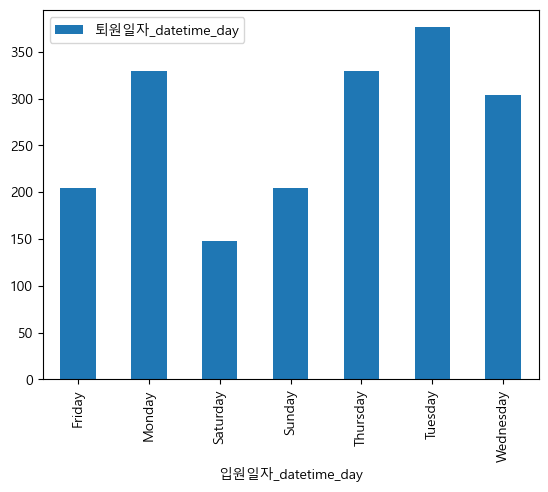

In [65]:
pd.pivot_table(data=df_ROS, index='입원일자_datetime_day', values='퇴원일자_datetime_day', aggfunc='count').plot(kind='bar')  

### 요일별 환자 입원/퇴원 추이 시각화 및 인사이트 2차 방법 (단순 시각화) 

In [66]:
# 요일별 입원 및 퇴원 카운트 계산
day_counts = df_ROS['입원일자_datetime_day'].value_counts()

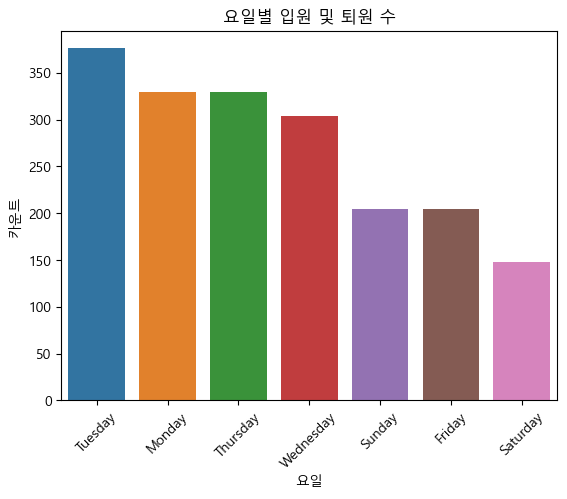

In [67]:
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('요일')
plt.ylabel('카운트')
plt.title('요일별 입원 및 퇴원 수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [ ]:
# 요일별 입원 및 퇴원 카운트 계산
day_counts = df_ROS['입원일자_datetime_day'].value_counts().sort_index()

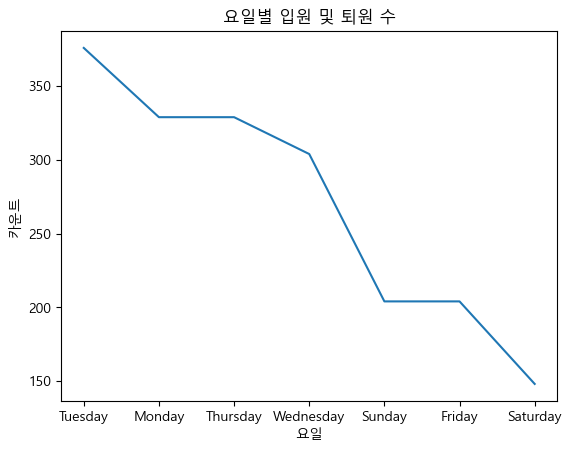

In [70]:
# 선 그래프 그리기
# plt.figure(figsize=(10, 5))
sns.lineplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('요일')
plt.ylabel('카운트')
plt.title('요일별 입원 및 퇴원 수')

plt.show()